In [31]:
import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")


SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [32]:
df_titanic = pd.read_csv('train.csv')
#making dataframe

In [33]:
df_titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
#Q1
df_titanic.head(6)
#info about first 6 passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [35]:
#Q2
df_titanic.columns 
#list the attributes

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
#Q3
print(len(df_titanic))
#size of dataset

891


In [37]:
#Q4
null_columns=df_titanic.columns[df_titanic.isnull().any()]
df_titanic.isnull().sum()
#missing values number are in the dataset for the columns “Age”,“Cabin” and “Embarked”

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
#Q4 
df_titanic.dropna()
#dropping null value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


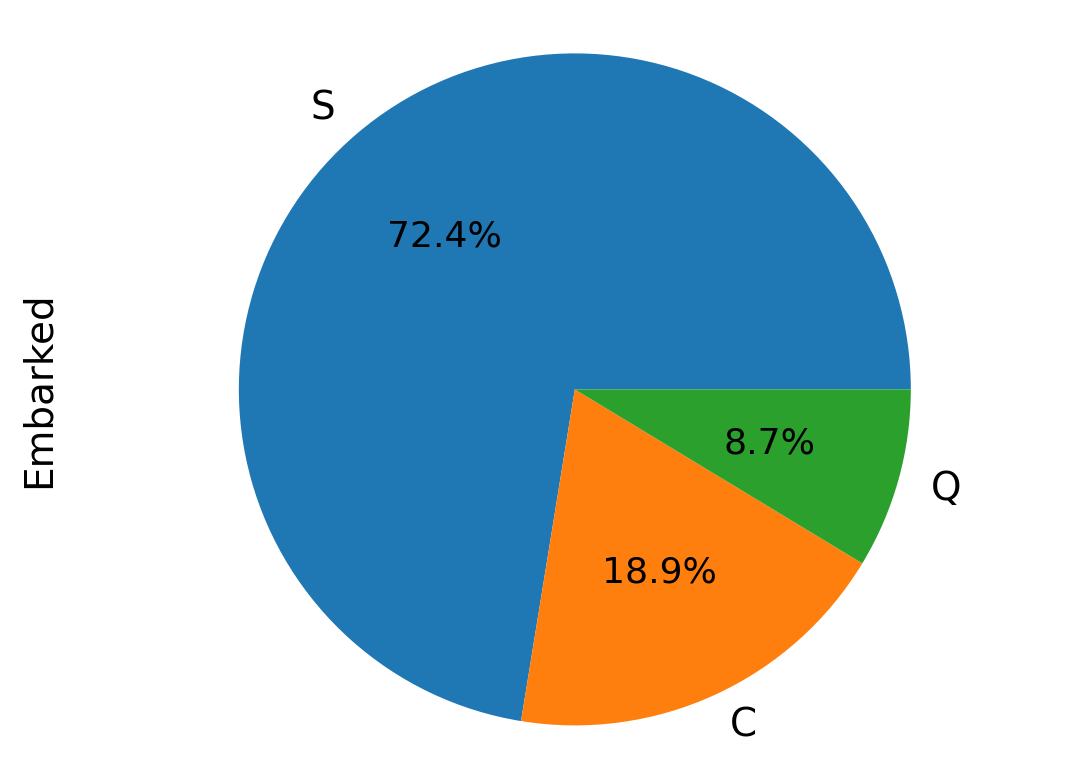

In [58]:
#Q5
df_titanic['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',) #create a pie chart
plt.axis('equal')
plt.show() 
#(S:Southampton, C:Cherbourg, Q:Queenstown)
#the most amount of people embarked from Southampton.
#the least amount of people embarked from Queenstown.


<AxesSubplot: title={'center': 'Pclass'}>

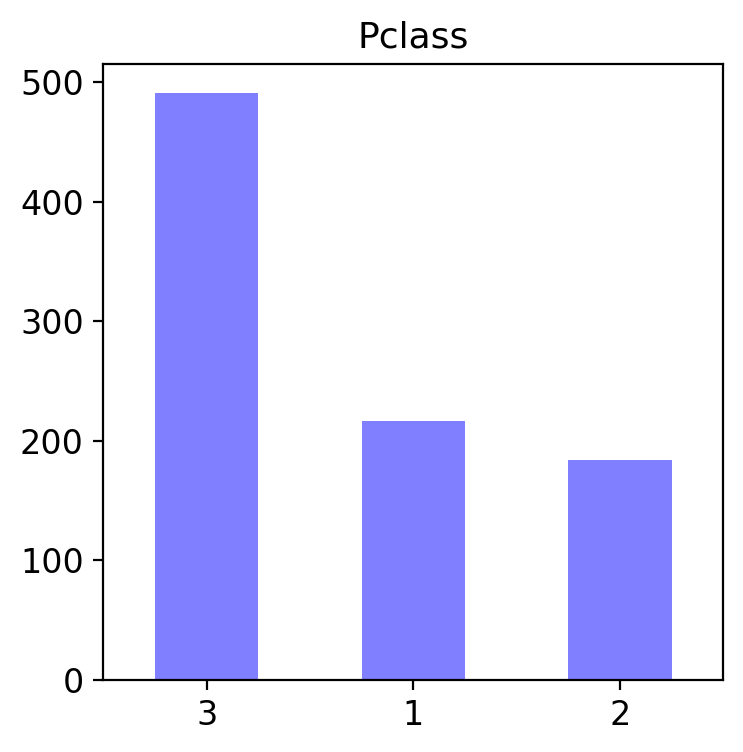

In [59]:
#Q6
df_titanic['Pclass'].value_counts().plot(kind='bar', title='Pclass', figsize=(4, 4), color='blue', alpha=0.5, rot=0, fontsize=12)
#ticket class 3 has max number of passengers

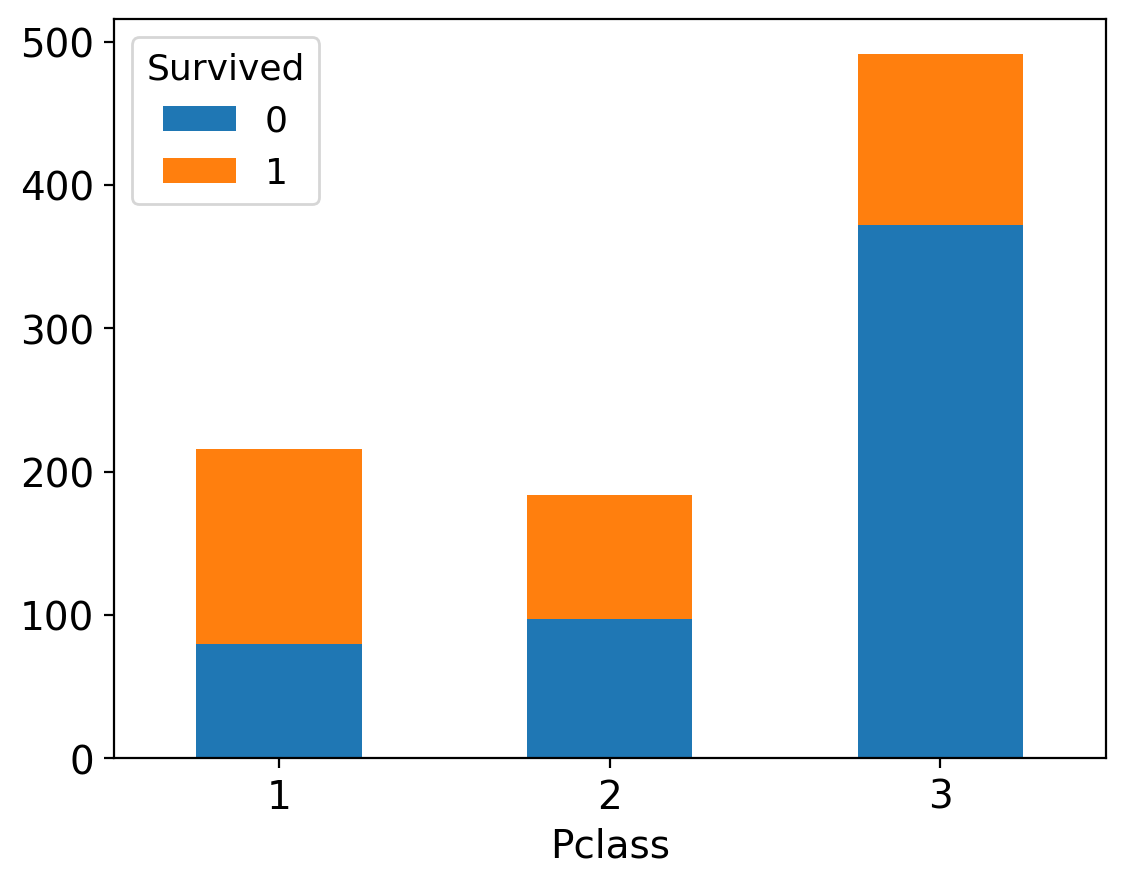

In [41]:
#Q7
# Creating crosstab


crosstb = pd.crosstab(df_titanic.Pclass, df_titanic.Survived,)
 
# Creating barplot
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

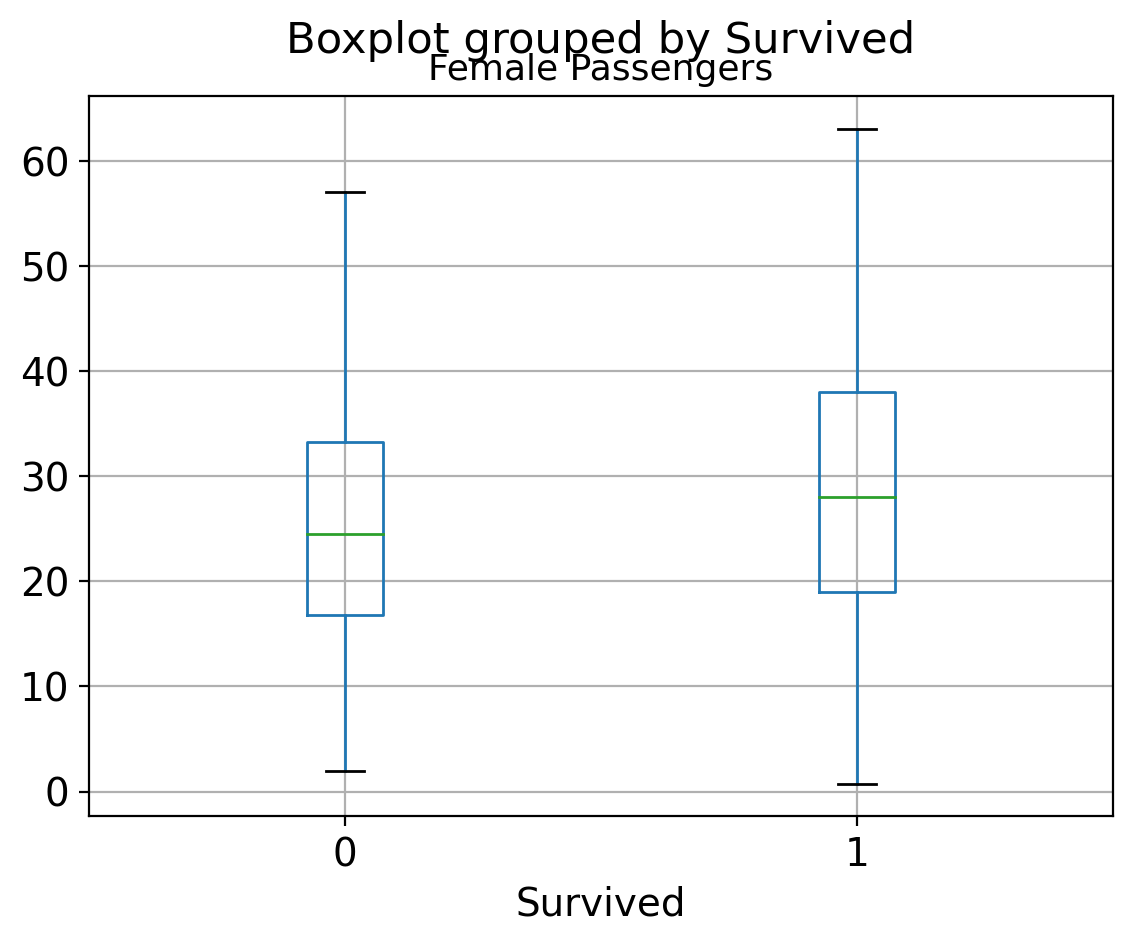

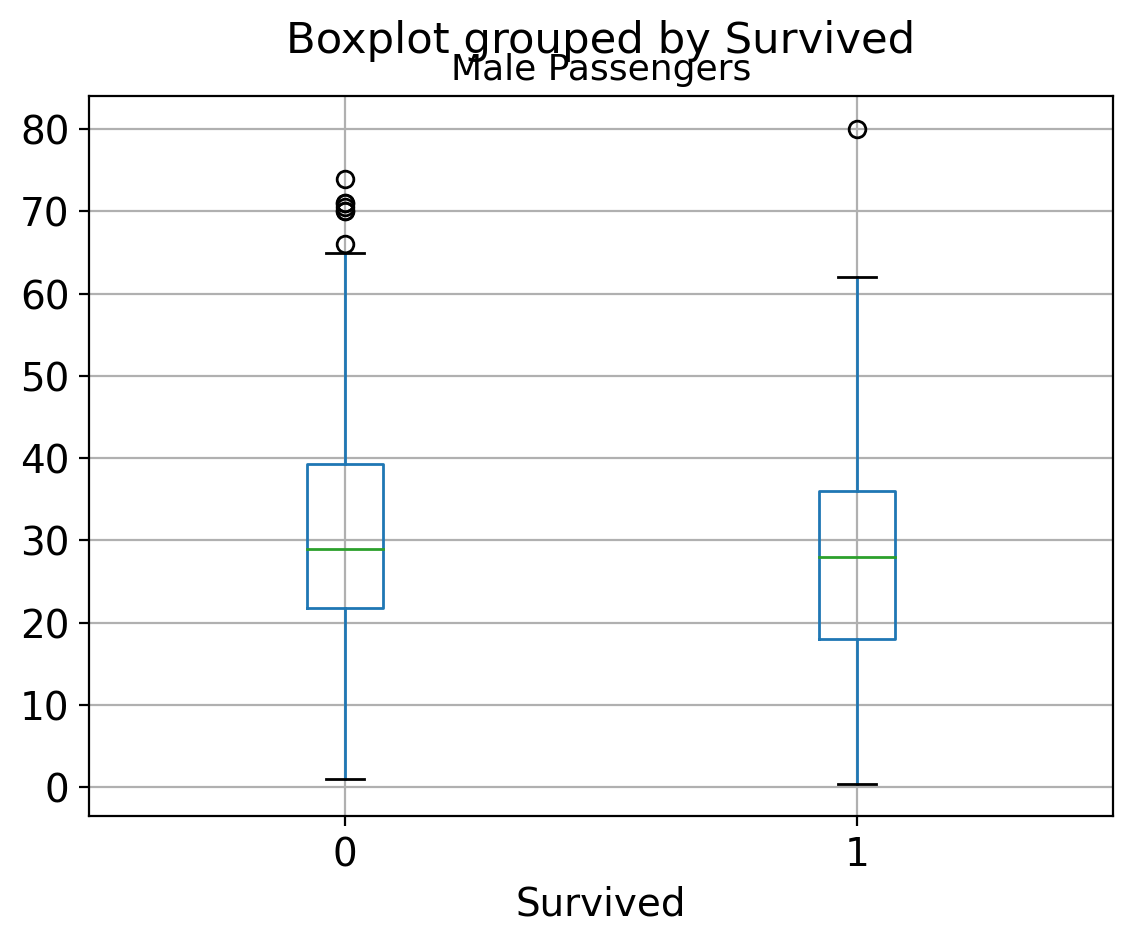

In [60]:
#Q8
female=df_titanic[df_titanic["Sex"].isin(["female"])]
female.boxplot(by ='Survived', column =['Age'], grid = True)
plt.title("Female Passengers")
plt.show() #closes the figure
plt.close() #use for close figure window.

male=df_titanic[df_titanic["Sex"].isin(["male"])]
male.boxplot(by ='Survived', column =['Age'], grid = True) 
plt.title("Male Passengers")
plt.show() #displays
plt.close() 
#create two boxplots that show the key age statistics of female and male passengers who survived and who did not survive
#amount of female who survived > amount of male who survived

In [43]:
#Q9
pd.crosstab(df_titanic['Sex'], df_titanic['Survived'], margins=True,margins_name="All")
#create crosstable

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [79]:
#Q10

#This table show that the survival number of women ist higher. I think this is due to the fact that women and children are given priority when boarding life jackets and canoes.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12120\1567092784.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: >

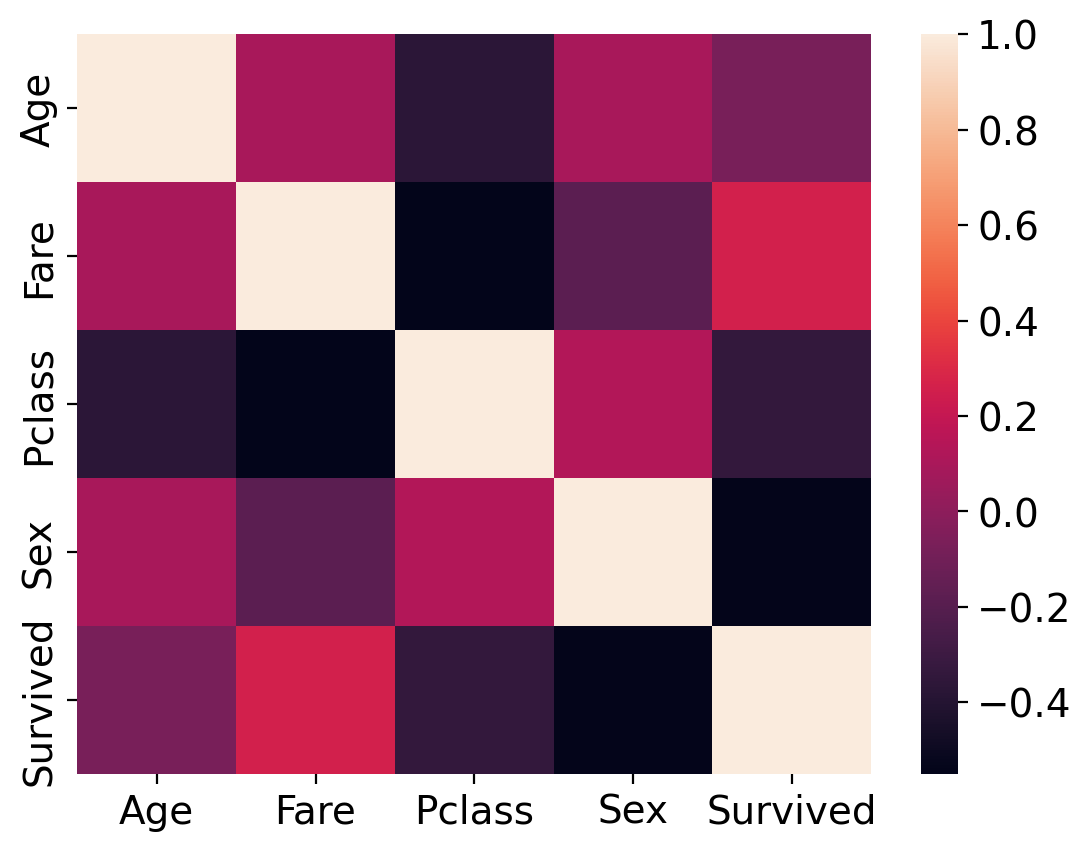

In [78]:
#Q11
couple_columns = df_titanic[['Age', 'Fare', 'Pclass', 'Sex', 'Survived']]
couple_columns['Sex']=couple_columns['Sex'].astype('category').cat.codes
sns.heatmap(couple_columns.corr())
# correlation between the attributes of survival, age, sex, fare, and ticket class.

In [83]:
#Q12
pearsoncorr = couple_columns.corr(method='pearson')
pearsoncorr

,Age,Fare,Pclass,Sex,Survived
Age,1.000000,0.096067,-0.369226,0.093254,-0.077221
Fare,0.096067,1.000000,-0.549500,-0.182333,0.257307
Pclass,-0.369226,-0.549500,1.000000,0.131900,-0.338481
Sex,0.093254,-0.182333,0.131900,1.000000,-0.543351
Survived,-0.077221,0.257307,-0.338481,-0.543351,1.000000


<AxesSubplot: >

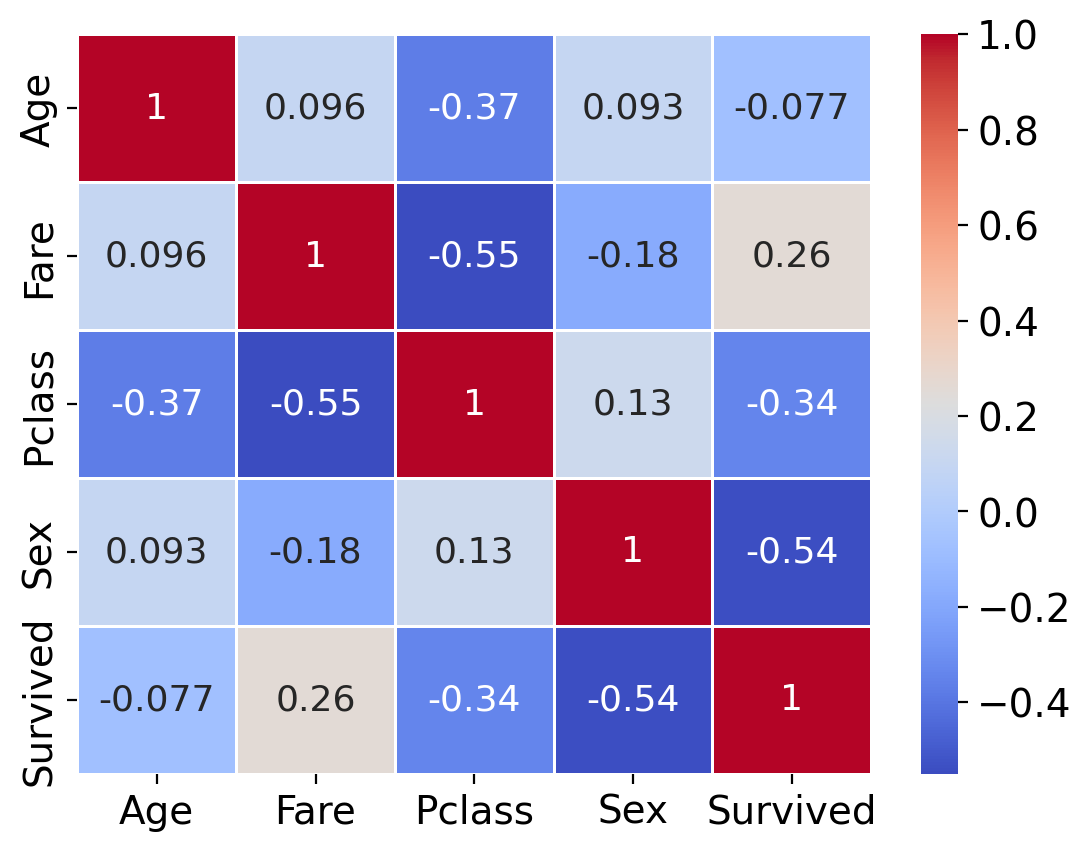

In [84]:
sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            annot=True,
            cmap='coolwarm',
            linewidth=0.5)
# there is almost no correlation between survivors and ticket class

In [71]:
#Q13
print('Youngest person Survived was of:',df_titanic['Age'].min())
#it shows age of  the youngest passenger

Youngest person Survived was of: 0.42


In [72]:
#Q14
df_titanic["Fare"].mean()
#it shows average fare

32.204207968574636

In [73]:
#Q15
print('Oldest person Survived was of:',df_titanic['Age'].max())
#it shows oldest person survived was of


Oldest person Survived was of: 80.0


In [19]:
#Q16
oldest = df_titanic['Age'][0]

for i in df_titanic.index :
    if ((df_titanic['Survived'][i]==1) and df_titanic['Sex'][i] == 'female'):
        if(df_titanic['Age'][i] > oldest):
            oldest = df_titanic['Age'][i]
print('Oldest female person Survived was of:',oldest)
#it shows oldest female person survived was of


Oldest female person Survived was of: 63.0


In [20]:
#Q17
df_titanic[(df_titanic['Age']<10) & (df_titanic['Parch']==False)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S


In [ ]:
# the child who is under 10 years old and has no parents shows that she may be orphan

<AxesSubplot: xlabel='Age', ylabel='Count'>

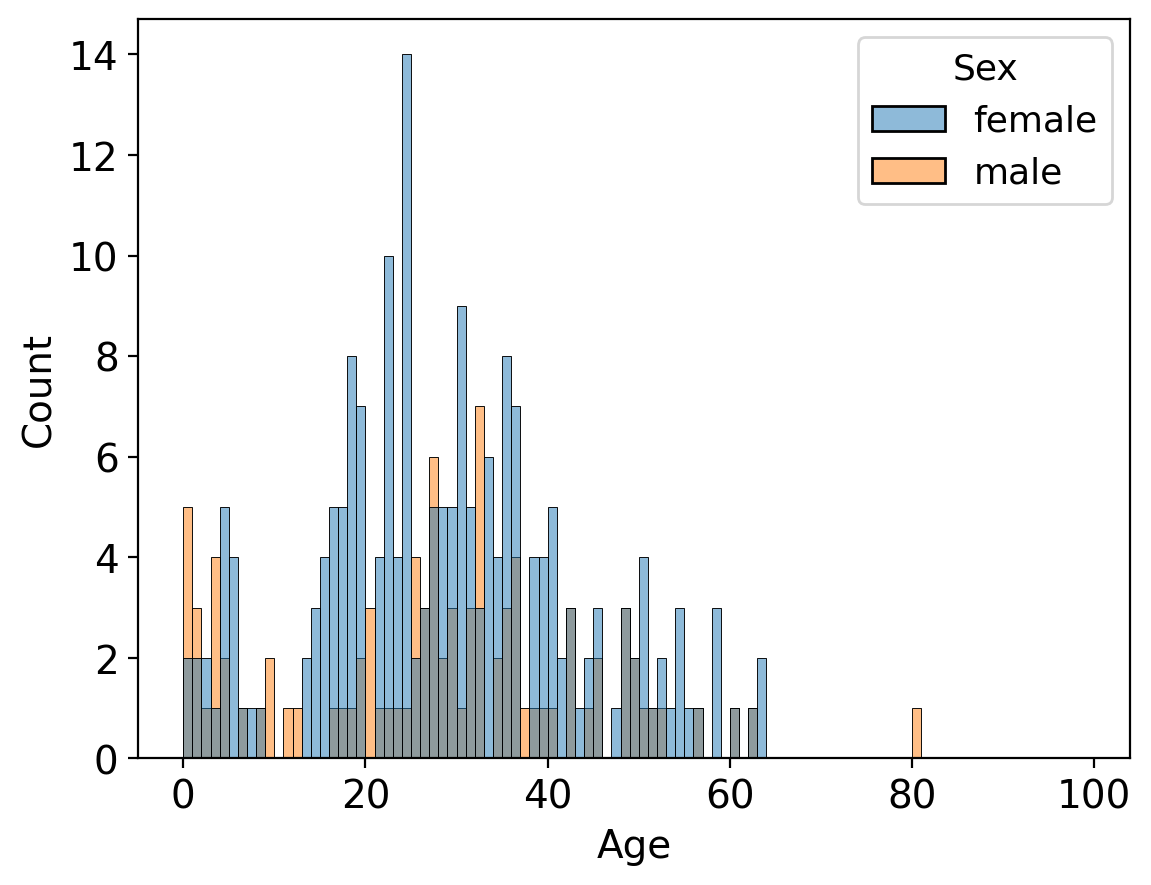

In [21]:
#Q18
new_df=df_titanic[df_titanic['Survived']==1]
sns.histplot(data=new_df,x='Age',bins=range(0,100), hue='Sex')
#Bfemale has a higher survival chance.

In [22]:
#Q19
df_titanic['SibSp'].max()
#it shows  number of siblings of the passenger who has the highest number of siblings.

8

<AxesSubplot: xlabel='Age', ylabel='Fare'>

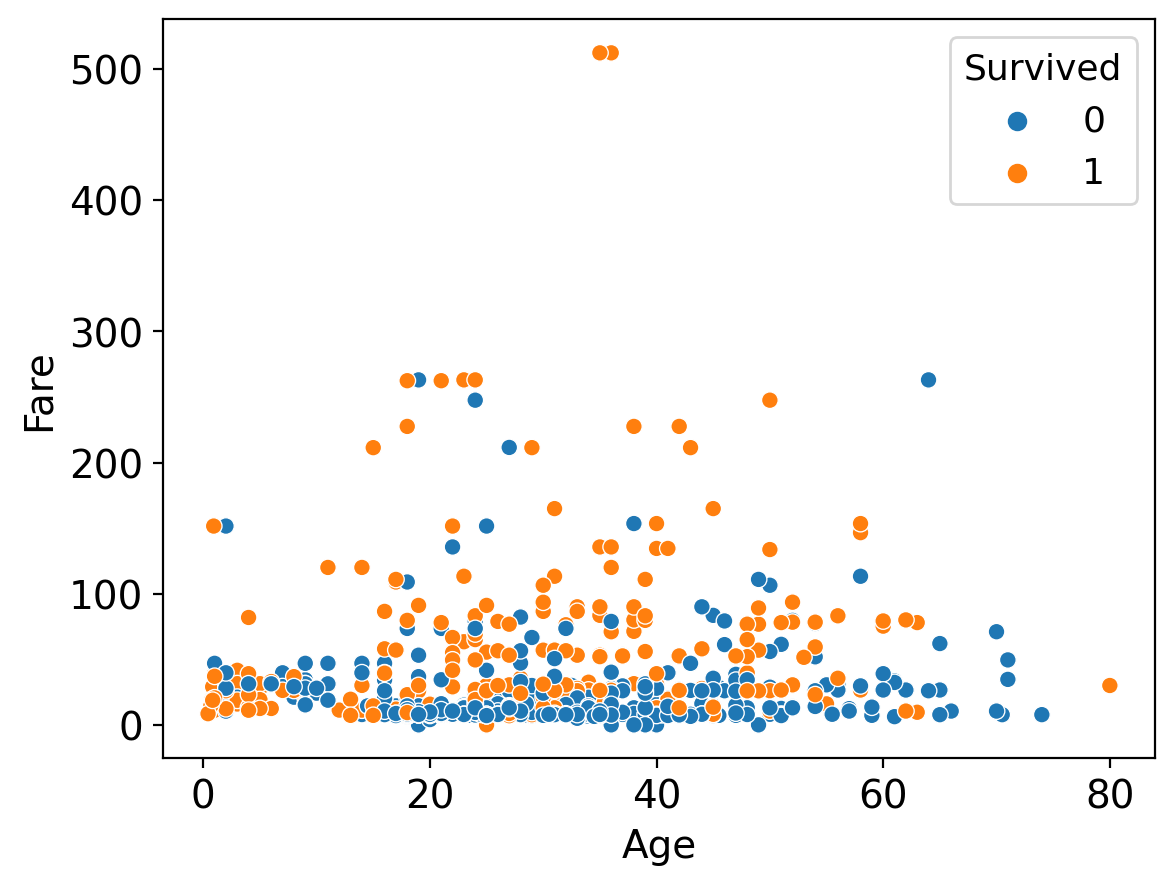

In [22]:
#Q20
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df_titanic)
#it  shows the age–fare correlation for passengers who survived  and who did not survive.